In [121]:
from sklearn.datasets import load_breast_cancer # Improta a Base de dados
breast_cancer = load_breast_cancer()
breast_cancer.keys() #Mostra as chaves da base de dados

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [122]:
X, y = breast_cancer.data, breast_cancer.target #Cria-se as duas bases X e y
X.shape, y.shape #Exibe o formato das bases. Ex.: 569 exemplos e 30 características em X, em y um rótulo para cada exemplo

((569, 30), (569,))

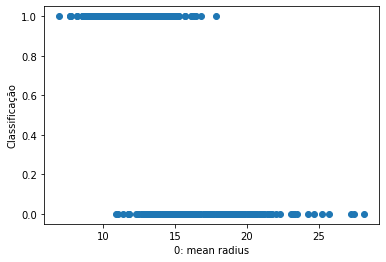

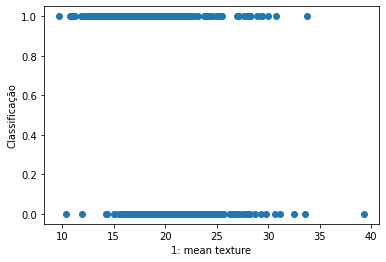

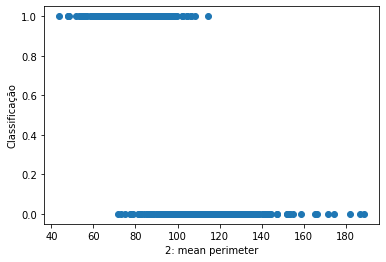

In [123]:
import matplotlib.pyplot as plt # Importando para fazer a plotagem dos gráficos
for i in range(3): # Apenas as 3 primeiras amostras
    plt.xlabel(f"{i}: {breast_cancer.feature_names[i]}") # Exibir quais característica que será apresentada
    plt.ylabel("Classificação") 
    plt.scatter(X[:,i], y) # Configura para exibir as características 
    plt.show() # Exibe o gráfico. Veja que o gráfico as amostras ou são 1 ou são zeros. Então essa é uma base de classificação binária.

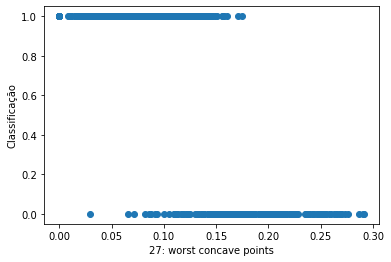

In [124]:
X27 = X[:,27:28] # Seleciona a característica em específica, a 27 no caso
plt.xlabel(f"27: {breast_cancer.feature_names[27]}") #Coloca o nome da característica 27 no eixo x do gráfico
plt.ylabel("Classificação") # Rótulo do eixo y
plt.scatter(X27, y) # Plotar o X27 contra o y
plt.show() # Exibe o gráfico

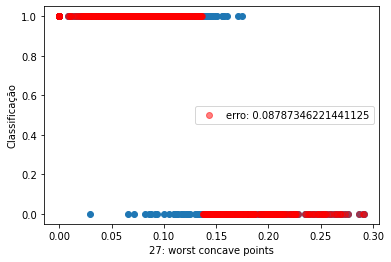

In [125]:
from sklearn.linear_model import LinearRegression # Para regressão linear
from sklearn.metrics import mean_squared_error # Para calcular o mse
 
class ClassificadorLinear():# Criado para ...?
    def __init__(self):
        self.lrmodel = LinearRegression() # Inciando a classe com um objeto do tipo LinearRegression
    def fit(self, X, y): # Fazendo o treinamento
        self.lrmodel.fit(X,y)
    def predict(self, X): # Fazendo a predição
        ypred = self.lrmodel.predict(X)
        ypred = (ypred>0.5).astype(int) # De 0,5 pra cima dizemos que é 1, de 0,5 para baixo dizemos que é zero
        return ypred

plt.xlabel(f"27: {breast_cancer.feature_names[27]}") # Coloca rótulo no eixo X
plt.ylabel("Classificação")# Coloca rótulo no eixo Y
plt.scatter(X27, y) # Monta o gráfico da amostra X27 contra o y

modelo = ClassificadorLinear() #Cria o classificador
modelo.fit(X27,y) # Faz o treinamento
ypred = modelo.predict(X27) # Utiliza a predição do classificador criado "ClassificadorLinear()"

erro = mean_squared_error(y, ypred) # Calcula o mse para o y e o ypred

plt.plot(X27, ypred, 'ro', label=f"erro: {erro}", alpha=0.5) # Coloca uma marcação em vermelho no gráfico e coloca a legenda do erro
plt.legend()
plt.show()

In [126]:
acuracia = sum(y==ypred)/len(y) #Calcular a proporção de acertos em relação aos erros. Ou seja somar todos os y que forem iguais aos ypred, dividindo pela quantidade de amostras
acuracia, 1-erro # Verja que o erro é o complemento da proporção de acertos (acuracia).

(0.9121265377855887, 0.9121265377855887)

In [127]:
from sklearn.metrics import accuracy_score #Importando o método de cálculo da acuracia do scikitlearn
print(accuracy_score(y,ypred)) # Utilizabndo acuracia direto do scikitlearn

0.9121265377855887


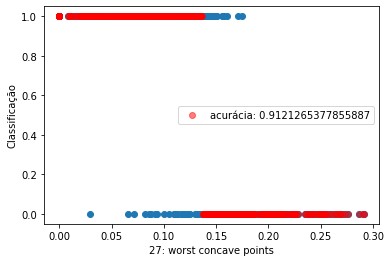

In [128]:
#===============================================================================================================================================================
#Aproveitando o código anterior
#===============================================================================================================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score #Importando o método de cálculo da acuracia do scikitlearn

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        ypred = (ypred>0.5).astype(int)
        return ypred

plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
modelo = ClassificadorLinear()
modelo.fit(X27,y)
ypred = modelo.predict(X27)
acuracia = accuracy_score(y, ypred)#<<<<<<<<<<<<<<------------------------------ Trocando para acuracia
plt.plot(X27, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)#<<<<<<<<<<<<<<------------------------------ Trocando para acuracia
plt.legend()
plt.show()

In [129]:
modelo = ClassificadorLinear()
modelo.fit(X,y) # Retreiando o classificador

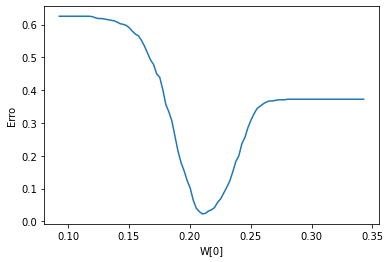

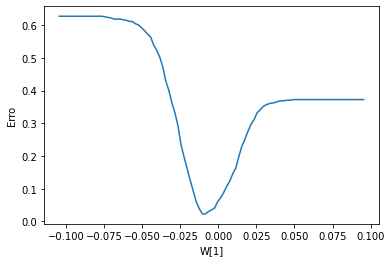

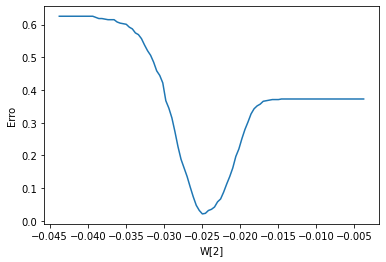

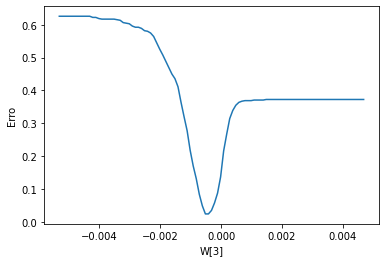

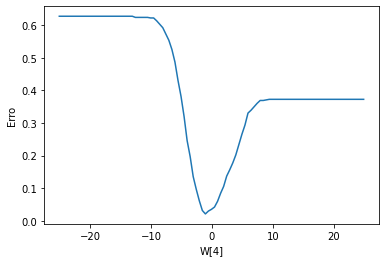

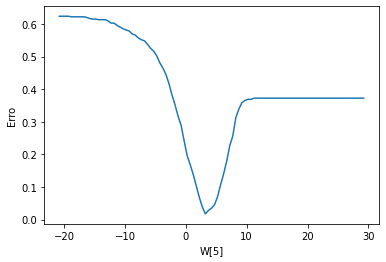

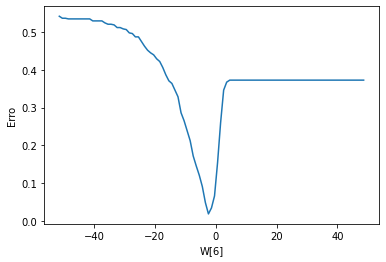

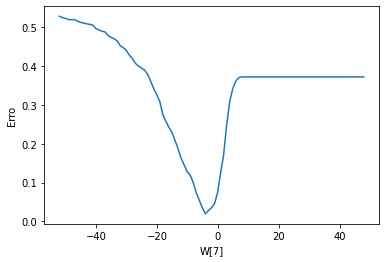

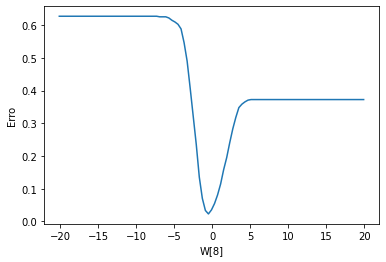

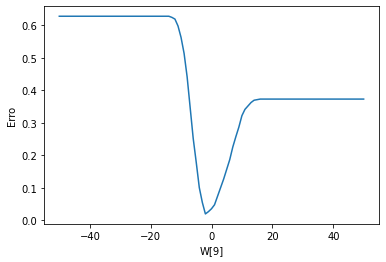

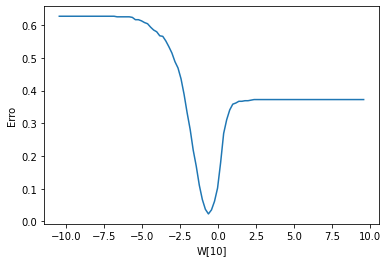

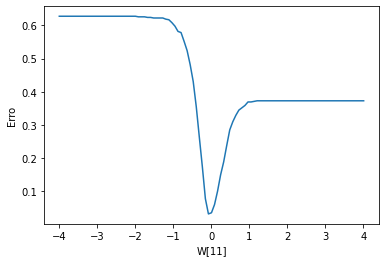

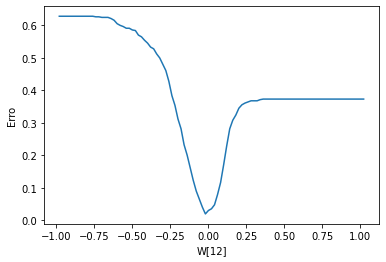

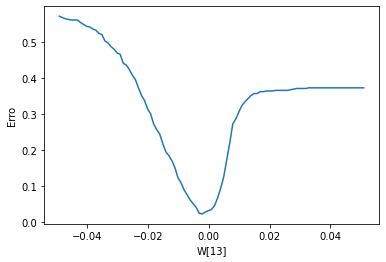

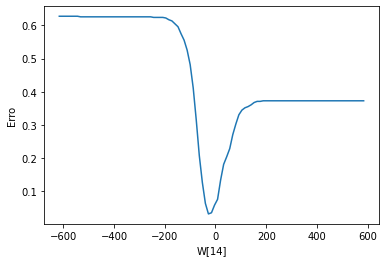

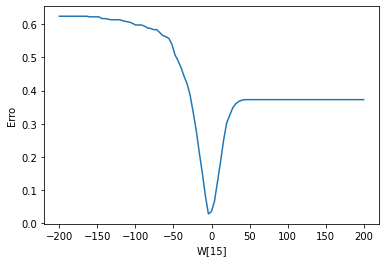

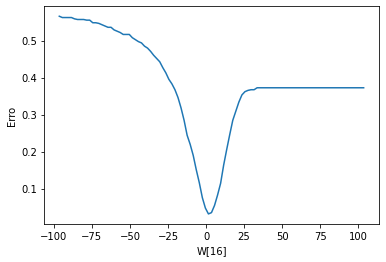

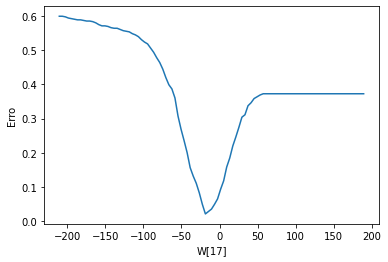

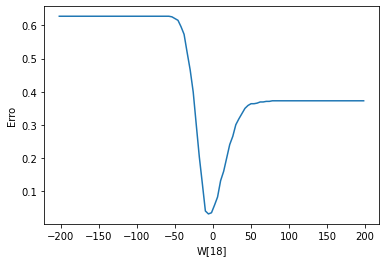

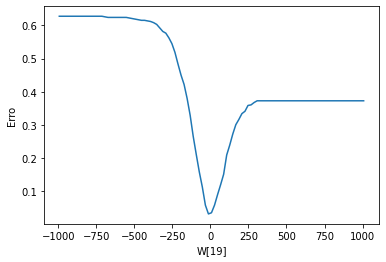

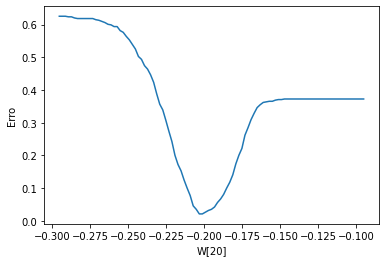

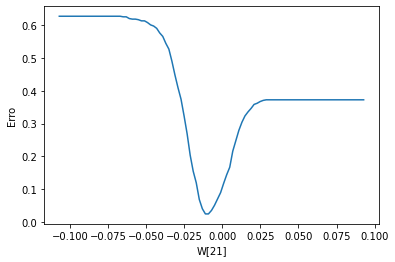

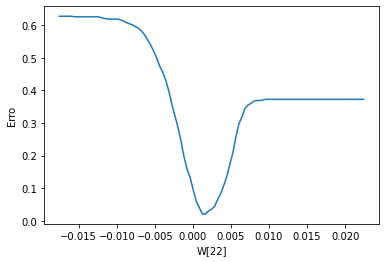

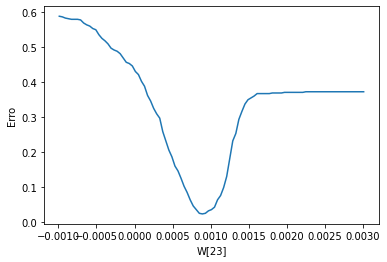

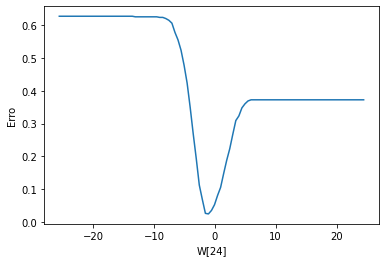

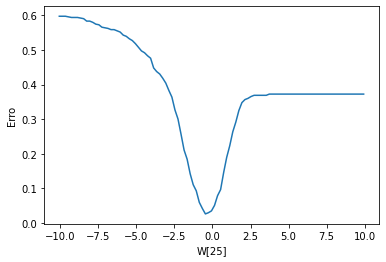

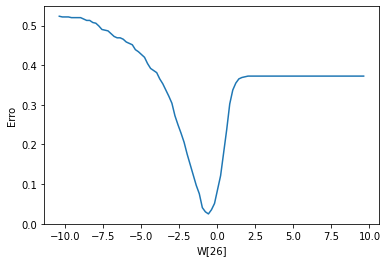

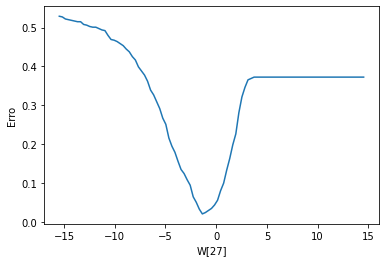

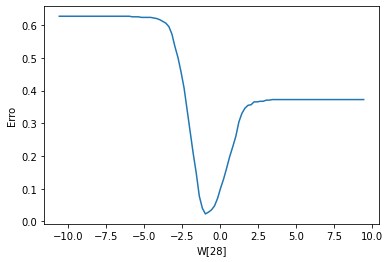

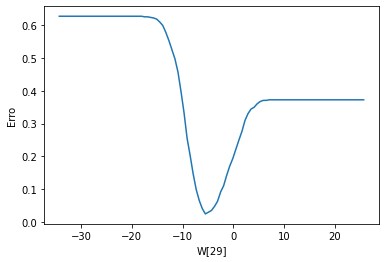

In [130]:
import numpy as np

delta = [0.125, 0.1, 0.02, 0.005, 25, 25, 50, 50, 20, 50, 10, 4, 1, 0.05, 600, 200, 100, 200, 200, 1000, 0.1, 0.1, 0.02, 0.002, 25, 10, 10, 15, 10, 30, 1] # Foi escolhidos esses coeficientes que é onde o gráfico se comporta de maneira mais acentuada

def plot(i):
    erros = []
    coef = modelo.lrmodel.coef_[i]
    ws = np.linspace(coef-delta[i], coef+delta[i], 101)
    for w in ws: # Percorre todas as posições do array
        modelo.lrmodel.coef_[i] = w # O coeficiente recebe a variação - e mais delta criado anteriormente
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred) # O erro é recalculado
        erros.append(erro) # ?
    modelo.lrmodel.coef_[i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.lrmodel.coef_)):
    plot(i)

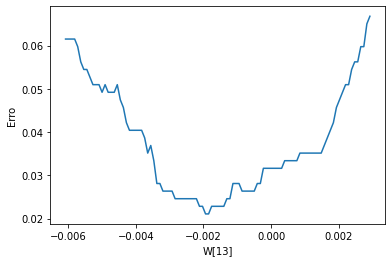

In [131]:
i=13 # Escolheu a característica 13 para ser analisada
erros = []
coef = modelo.lrmodel.coef_[i]
ws = np.linspace(coef-0.007, coef+0.002, 101)
for w in ws:
    modelo.lrmodel.coef_[i] = w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
modelo.lrmodel.coef_[i] = coef
plt.ylabel("Erro")
plt.xlabel(f"W[{i}]")
plt.plot(ws,erros)
plt.show() # Perceba que a função possui muitos mínimos locais e a plotagem não fica direitinha igualmente no problema de regressão

In [132]:
from sklearn.datasets import load_iris # Será carregado um dataset do scikitlearn
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape, set(y) # Visualizando o formato do dataset. "set(y)" significa que cada característica possui um rótulo e há 3 possíveis rótulos (0, 1, 2)

((150, 4), (150,), {0, 1, 2})

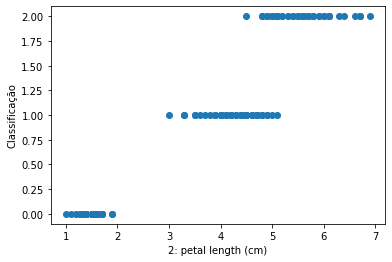

In [133]:
X2 = X[:,2:3] # Selecionando a segunda característica
plt.xlabel(f"2: {iris.feature_names[2]}") # Colocando um nome para o eixo X
plt.ylabel("Classificação") # Colocando um nome para o eixo y
plt.scatter(X2, y) # Plotar a característica X2 contra o y
plt.show()

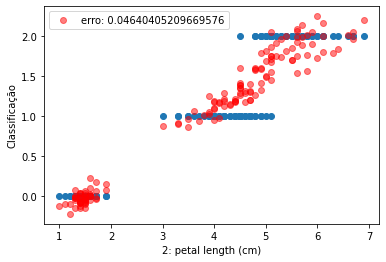

In [134]:
#===============================================================================================================================================================
#Aproveitando o código anterior
#===============================================================================================================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        # ypred = (ypred>0.5).astype(int) #<<<<<<<<<<<<<<------------------------------ Tirando a parte de classificação
        return ypred

plt.xlabel(f"2: {iris.feature_names[2]}") #<<<<<<<<<<<<<<------------------------------  Selecionando informações da característica 2
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X,y) #<<<<<<<<<<<<<<------------------------------  Treinando o modelo com toda a base X e não apenas X2
ypred = modelo.predict(X) #<<<<<<<<<<<<<<------------------------------  Calculando o ypred com toda a base X e não apenas X2
erro = mean_squared_error(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"erro: {erro}", alpha=0.5) #<<<<<<<<<<<<<<------------------------------  Plotando o modelo com X2 e não com toda a base X
plt.legend()
plt.show()

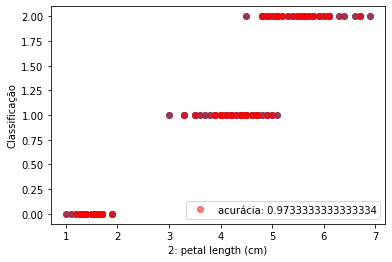

In [135]:
#===============================================================================================================================================================
#Aproveitando o código anterior já adaptado para o dataset iris
#===============================================================================================================================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        #ypred = (ypred>0.5).astype(int) # Se deixar dessa forma o classificador retornará ou 0 ou um, é necessário uma outra adaptação
        ypred = np.rint(ypred) #Essa função arrendondamento para o inteiro mais próximo
        return ypred

plt.xlabel(f"2: {iris.feature_names[2]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

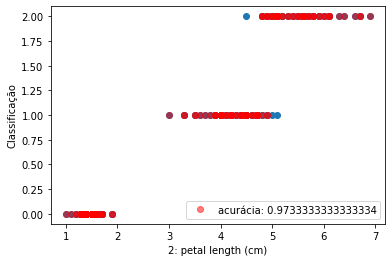

In [136]:
#===============================================================================================================================================================
#Aproveitando o código anterior e utilizando a função de classificação do scikitlearn
#===============================================================================================================================================================

from sklearn.linear_model import LogisticRegression # Ao invés de LinearRegression (que é um algorítimo de regressão) utilizar o LogisticRegression (que apesar do nome é um algoritmo de classificação)
from sklearn.metrics import accuracy_score

plt.xlabel(f"2: {iris.feature_names[2]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = LogisticRegression()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

In [137]:
modelo.intercept_

array([  9.83911149,   2.2144612 , -12.0535727 ])

(1797, 64)


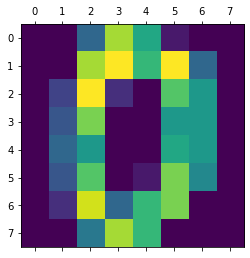

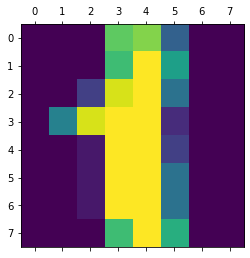

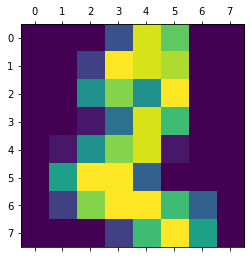

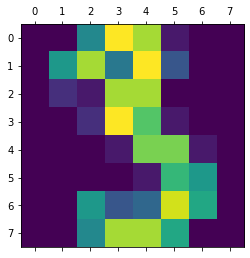

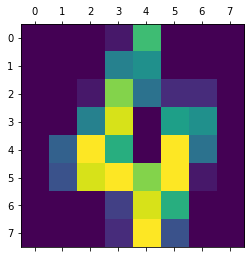

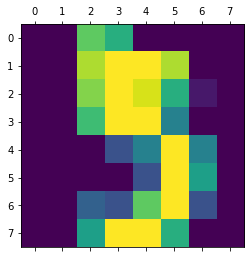

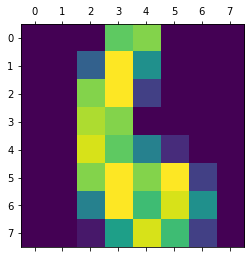

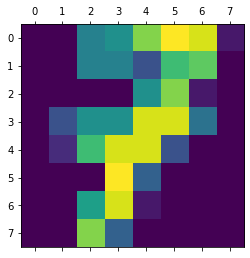

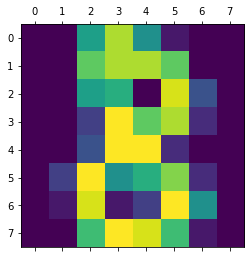

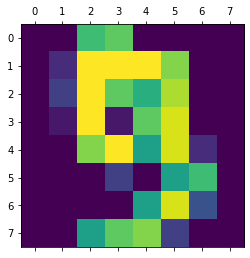

In [138]:
#Dentro do scikitlearn datasets não há uma base multirótulos. Será utilizado a base load_digits como ponta pé inicial para criaçãod e uma base multirótulo artificial
from sklearn.datasets import load_digits # Carregando o dataset
digits = load_digits()
print(digits.data.shape) # Verificando o formato do dataset

import matplotlib.pyplot as plt
for i in range(10): #Serão plotados somente as primeiras 10 imagens
    plt.matshow(digits.images[i])
    plt.show() # Veja que tem 1797 exemplos e com 64 características

In [139]:
X, y = digits.data, digits.target
X.shape, y.shape #Verificando o formato do X e do y. Veja que somente há um rótulo para cada exemplo 1797 em X e em y

((1797, 64), (1797,))

In [140]:
ynovo = np.c_[y>5, y%2] # Cria-se um novo (uma cópia "np.c") y 
ynovo.T # Exibindo o ynovo de forma transposta (T)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int32)

In [141]:
ynovo.shape # Veja  que agora há dois possíveis rótulos para os 1797 exemplos do data set

(1797, 2)

In [142]:
# classificador LogisticRegression não serve para bases multirótulos. Terá que carregar um classificador que consiga trabalhar com multirótulo, o KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier # Importando o classificador

modelo = KNeighborsClassifier() # Criando o modelo baseado no classificador multireótulo
modelo.fit(X, ynovo) # Treinando o modelo
ypred = modelo.predict(X) # Fazendo a predição com todos os dados (X)
ypred.T # Exibindo o pred de forma transposta (T)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int32)

In [143]:
#Medindo se com o novo classificador tivemos uma acuracia melhor do que utilizando o logisticRegression
from sklearn.metrics import accuracy_score

acuracia_grandes = accuracy_score(y>5, ypred[:,0]) # Para y maior que 5 e utilizando todos os exemplos (:), da primeira coluna (0)
acuracia_impares = accuracy_score(y%2, ypred[:,1]) # Para y sendo impar e utilizando todos os exemplos (:), da segunda coluna (1)
acuracia_grandes, acuracia_impares

(0.993322203672788, 0.9961046188091264)

In [144]:
#Preciso saber se o classificador é bom para os dois ao mesmo tempo. É necessário uma métrica específica para multirótulo
from sklearn.metrics import hamming_loss # Métrica bastante utilizada para multirótulo

erro = hamming_loss(ynovo, ypred)# O haming_loss calcula a distancia entre os pontos preditos (ypred) e os pontos reais (ynovo)
erro

0.0052865887590428495